### Regression with Neural Networks

In [142]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor

We'll work with the <a href="https://archive.ics.uci.edu/ml/datasets/auto+mpg">Auto MPG Data Set</a> from the UC Irvine repository.

We want to predict a car's fuel economy in miles per gallon (mpg) from its other characteristics using a neural network.

In [55]:
names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"] 
df = pd.read_csv("auto-mpg.csv", sep=",", names=names, index_col=8)
XX = df.values
y = XX[:, 0] #mpg
country = np.array([XX[:, -1] == 1., XX[:, -1] == 2., XX[:, -1] == 3.]).T*1
X = np.hstack([XX[:, 1:-1], country])
# StandardScaler(copy=False).fit(X).transform(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

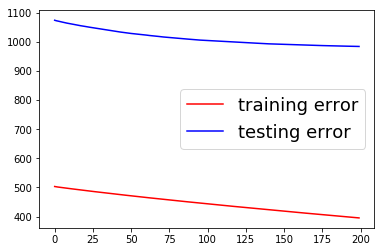

In [101]:
# Simple linear regression
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="rmsprop", metrics=["mse"])
model.fit(X, y, validation_split=0.2, epochs=200, verbose=0)
plt.plot(model.history.history["loss"], 'r', label="training error")
plt.plot(model.history.history["val_loss"], 'b', label="testing error")
plt.legend(fontsize=18)
plt.show()

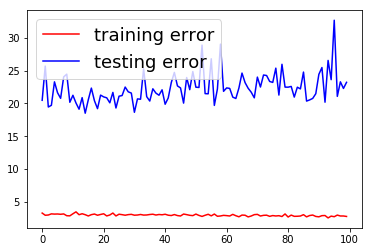

In [87]:
model = keras.Sequential()
model.add(keras.layers.Dense(2048, input_dim=X.shape[1], activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="rmsprop", metrics=["mse"])
model.fit(X, y, validation_split=0.2, epochs=300, verbose=0)
plt.plot(model.history.history["loss"][200:], 'r', label="training error")
plt.plot(model.history.history["val_loss"][200:], 'b', label="testing error")
plt.legend(fontsize=18)
plt.show()

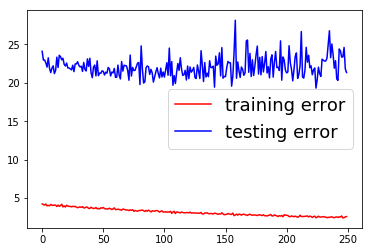

In [89]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
# model.add(keras.layers.Dense(64, input_dim=X.shape[1], activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="rmsprop", metrics=["mse"])
model.fit(X, y, validation_split=0.2, epochs=300, verbose=0)
plt.plot(model.history.history["loss"][50:], 'r', label="training error")
plt.plot(model.history.history["val_loss"][50:], 'b', label="testing error")
plt.legend(fontsize=18)
plt.show()

In [133]:
class NN(BaseEstimator, RegressorMixin):
    def __init__(self, n_units, n_hidden_layers=1):
        self.n_units = n_units
        self.n_hidden_layers = n_hidden_layers
        model = keras.Sequential()
        for i in range(self.n_hidden_layers):
            model.add(keras.layers.Dense(self.n_units, activation="relu"))
        model.add(keras.layers.Dense(1, activation="linear"))
        model.compile(loss="mse", optimizer="rmsprop", metrics=["mse"])
        self.model = model
    
    def fit(self, X, y, **kwargs):
        self.model.fit(X, y, **kwargs)
        
    def predict(self, X):
        return self.model.predict(X)

In [134]:
scores = []
for k in range(1, 11):
    print(f"Number of hidden units: {2**k}")
    R = NN(2**k)
    score = cross_val_score(R, X, y, scoring="neg_mean_squared_error", cv=5, fit_params={"epochs": 200, "verbose": 0}).mean()
    scores.append(score)

Number of hidden units: 2
Number of hidden units: 4
Number of hidden units: 8
Number of hidden units: 16
Number of hidden units: 32
Number of hidden units: 64
Number of hidden units: 128
Number of hidden units: 256
Number of hidden units: 512
Number of hidden units: 1024


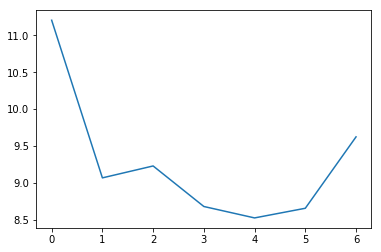

In [135]:
plt.plot(-np.array(scores[3:]))

In [140]:
scores = []
for k in range(10):
    print(f"Number of hidden layers: {k}")
    R = NN(2**4, n_hidden_layers=k)
    score = cross_val_score(R, X, y, scoring="neg_mean_squared_error", cv=5, fit_params={"epochs": 200, "verbose": 0}).mean()
    scores.append(score)

Number of hidden layers: 0
Number of hidden layers: 1
Number of hidden layers: 2
Number of hidden layers: 3
Number of hidden layers: 4
Number of hidden layers: 5
Number of hidden layers: 6
Number of hidden layers: 7
Number of hidden layers: 8
Number of hidden layers: 9


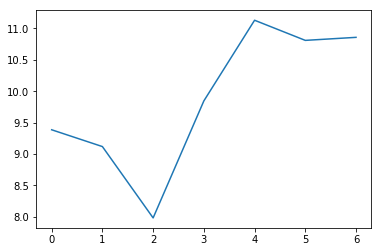

In [141]:
plt.plot(-np.array(scores[3:]))

In [138]:
R = NN(2**4, n_hidden_layers=10)
score = cross_val_score(R, X, y, scoring="neg_mean_squared_error", cv=5, fit_params={"epochs": 200, "verbose": 0}).mean()

In [139]:
-score

10.878770222045917

In [148]:
R = RandomForestRegressor(n_estimators=100, oob_score=True)

In [149]:
R.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [155]:
np.mean((R.oob_prediction_ - y)**2)

7.862455902758907